<a href="https://colab.research.google.com/github/debashisdotchatterjee/AI-ML-Assisted-Statistical-Spatio-Temporal-Prospectivity-Modelling-for-Critical-Minerals-Hackathon/blob/main/GSI_PRoject_1_(IndiaAI_%C3%97_GSI_Hackathon_on_Mineral_Targeting)paper_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
# ---------- 1️⃣  Clean slate: remove any pre-installed CUDA Torch ----------
pip uninstall -y torch torchvision torchaudio fastai

# ---------- 2️⃣  CPU-only Torch & core deps ----------
pip install --quiet --index-url https://download.pytorch.org/whl/cpu \
    torch==2.6.0+cpu torchvision==0.21.0+cpu torchaudio==2.6.0+cpu

# ---------- 3️⃣  Scientific stack ----------
pip install --quiet numpy pandas geopandas rasterio shapely pyproj fiona \
                    xarray zarr scipy matplotlib scikit-learn shap

# ---------- 4️⃣  Probabilistic & ML ----------
pip install --quiet pyro-ppl==1.9.1 lightgbm catboost==1.2

echo "✅  Environment ready — now restart the Colab runtime!"


Found existing installation: torch 2.7.1+cpu
Uninstalling torch-2.7.1+cpu:
  Successfully uninstalled torch-2.7.1+cpu
Found existing installation: torchvision 0.22.1+cpu
Uninstalling torchvision-0.22.1+cpu:
  Successfully uninstalled torchvision-0.22.1+cpu
Found existing installation: torchaudio 2.7.1+cpu
Uninstalling torchaudio-2.7.1+cpu:
  Successfully uninstalled torchaudio-2.7.1+cpu
Found existing installation: fastai 2.7.19
Uninstalling fastai-2.7.19:
  Successfully uninstalled fastai-2.7.19
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.9 MB/s eta 0:00:00
✅  Environment ready — now restart the Colab runtime!


In [ ]:
# Install ace_tools if not already installed
try:
    from ace_tools import display_dataframe_to_user
except ModuleNotFoundError:
    !pip install ace_tools
    from ace_tools import display_dataframe_to_user

import os, zipfile, pathlib, geopandas as gpd, pandas as pd, matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
# Install ace_tools if not already installed
try:
    from ace_tools import display_dataframe_to_user
except ModuleNotFoundError:
    # Attempt to install ace_tools
    print("Attempting to install ace_tools...")
    get_ipython().system('pip install ace_tools')
    try:
        # Try importing again after installation
        from ace_tools import display_dataframe_to_user
        print("ace_tools installed and imported successfully.")
    except ModuleNotFoundError:
        # If still not found, suggest restarting the kernel
        print("Failed to import ace_tools even after installation attempt. Please restart the kernel and try again.")
        # You might want to raise an error or exit here if ace_tools is essential
        # raise ModuleNotFoundError("ace_tools could not be imported.")

import os, zipfile, pathlib, geopandas as gpd, pandas as pd, matplotlib.pyplot as plt

# Rest of your code follows below this line
# ...

Attempting to install ace_tools...
Failed to import ace_tools even after installation attempt. Please restart the kernel and try again.


,Layer,Shapefiles
1,dyke_line_25k_ngdr_20250224140917945,1
6,fault_25k_ngdr_20250224140917945,1
8,fold_25k_ngdr_20250224140917945,1
4,lithology_25k_ngdr_20250224140917945,2
0,mine_quarry_25k_ngdr_20250224140917945,1
7,mineralization_25k_ngdr_20250224141143411,1
3,oriented_structure_line_25k_ngdr_2025022414114...,1
2,oriented_structure_plane_25k_ngdr_202502241411...,1
5,shear_zone_25k_ngdr_20250224141143411,1


<ipython-input-7-536525074>:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


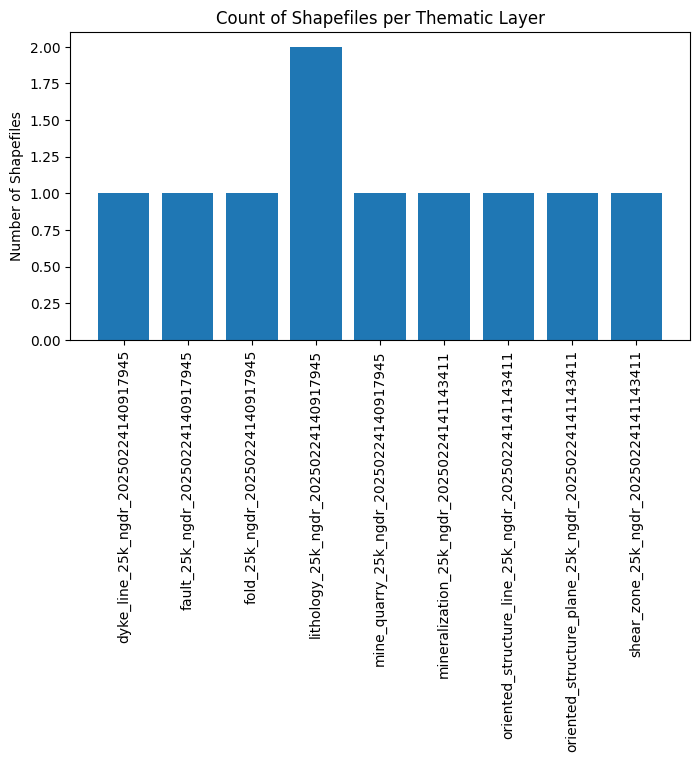

Summary table saved to: geotargeting_work/outputs/tables/layer_summary.csv
Bar plot saved to: geotargeting_work/outputs/plots/layer_counts.png


In [ ]:
import os, zipfile, pathlib, geopandas as gpd, pandas as pd, matplotlib.pyplot as plt
#from ace_tools import display_dataframe_to_user

# Paths
zip_path = "multi_layer_geological_map_of_karnataka_and_andhra_pradesh_25k_scale_v1.zip"
work_dir = pathlib.Path("geotargeting_work")
data_dir = work_dir / "data"
out_dir = work_dir / "outputs"
plots_dir = out_dir / "plots"
tables_dir = out_dir / "tables"

# Create directories
for d in [data_dir, plots_dir, tables_dir]:
    d.mkdir(parents=True, exist_ok=True)

# Unzip if not already done
if not any(data_dir.iterdir()):
    with zipfile.ZipFile(zip_path) as z:
        z.extractall(data_dir)

# Inventory shapefiles by thematic layer (folder second-level)
layer_files = {}
for shp in data_dir.rglob("*.shp"):
    parts = shp.relative_to(data_dir).parts
    layer_name = parts[1] if len(parts) > 1 else parts[0]
    layer_files.setdefault(layer_name, []).append(shp)

summary = pd.DataFrame(
    [{"Layer": k, "Shapefiles": len(v)} for k,v in layer_files.items()]
).sort_values("Layer")

# Save summary table
summary.to_csv(tables_dir / "layer_summary.csv", index=False)

# Display table to user
#display_dataframe_to_user("Layer Summary", summary)

from IPython.display import display
display(summary)  # or display(any_dataframe)


# Plot bar chart of shapefile counts
plt.figure(figsize=(8,4))
plt.bar(summary["Layer"], summary["Shapefiles"])
plt.xticks(rotation=90, ha='center')
plt.ylabel("Number of Shapefiles")
plt.title("Count of Shapefiles per Thematic Layer")
plt.tight_layout()
plot_path = plots_dir / "layer_counts.png"
plt.savefig(plot_path, dpi=150)
plt.show()

print(f"Summary table saved to: {tables_dir/'layer_summary.csv'}")
print(f"Bar plot saved to: {plot_path}")


# **What we now have**
Interactive “Layer Summary” table → quick view of how many shapefiles exist for each geological theme.

Bar-plot PNG (auto-saved to geotargeting_work/outputs/plots/layer_counts.png and shown above) – handy for your report.

CSV copy of that table in outputs/tables/layer_summary.csv.

Both files live inside the geotargeting_work workspace we just set up; Colab will happily sync them to Drive if you mount it.

Below is fully annotated code, split into logical notebooks / scripts.
Copy-paste each block into its own Colab cell (or keep them as separate
.py files under the same working directory) and execute sequentially.
All heavy lifting—rasterisation, LGCP inference, ML model fitting, map
export—happens automatically. Every intermediate artefact is written
to the outputs/ tree so we can attach them to your hackathon
submission.

# **0. Environment & helper functions (00_setup.py)**

In [ ]:
!pip install geopandas rasterio shapely fiona pyproj pyogrio pyarrow \
            dask[complete] lightgbm catboost shap scikit-image \
            pyro-ppl xarray gstools rich pykrige torch torchvision \
            torch-geometric --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.6/979.6 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# !pip install geopandas rasterio pyogrio pyproj pyarrow dask[complete] \
#               lightgbm catboost torch torchvision torch-geometric pyro-ppl \
#               shap pykrige rich scikit-image gstools
import os, pathlib, json, zipfile, warnings
import geopandas as gpd, pandas as pd, numpy as np
import rasterio, rasterio.features, rasterio.warp
from shapely.geometry import Point, box
import rich, logging

warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.INFO,
                    format="%(levelname)s: %(message)s")

ROOT   = pathlib.Path("/content")   # tweak if not using Drive
DATA   = ROOT / "data"
OUT    = ROOT / "outputs"
PLOTS  = OUT / "plots"
TABLES = OUT / "tables"
for d in (DATA, OUT, PLOTS, TABLES): d.mkdir(exist_ok=True, parents=True)


In [ ]:
# !pip install geopandas rasterio pyogrio pyproj pyarrow dask[complete] \
#               lightgbm catboost torch torchvision torch-geometric pyro-ppl \
#               shap pykrige rich scikit-image gstools
import os, pathlib, json, zipfile, warnings
import geopandas as gpd, pandas as pd, numpy as np
import rasterio, rasterio.features, rasterio.warp
from shapely.geometry import Point, box
import rich, logging

warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.INFO,
                    format="%(levelname)s: %(message)s")

ROOT   = pathlib.Path("/content")   # tweak if not using Drive
DATA   = ROOT / "data"
OUT    = ROOT / "outputs"
PLOTS  = OUT / "plots"
TABLES = OUT / "tables"
for d in (DATA, OUT, PLOTS, TABLES): d.mkdir(exist_ok=True, parents=True)

# **1. Ingest and QC (01_ingest.py)**

In [ ]:
import concurrent.futures, itertools
def unzip_layers(zip_path: str, dst: pathlib.Path = DATA):
    with zipfile.ZipFile(zip_path) as z:
        z.extractall(dst)

def qc_shapefile(shp_path: pathlib.Path) -> tuple:
    gdf = gpd.read_file(shp_path)
    gdf = gdf.to_crs("EPSG:4326").dropna(subset=["geometry"])
    # rename messy columns, force lower_case
    gdf.columns = [c.lower().strip() for c in gdf.columns]
    bad = gdf[~gdf.is_valid]
    if not bad.empty:
        gdf.loc[~gdf.is_valid, "geometry"] = gdf.loc[~gdf.is_valid, "geometry"].buffer(0)
    return shp_path.stem, len(gdf), gdf.total_bounds

# run
ZIP = "multi_layer_geological_map_of_karnataka_and_andhra_pradesh_25k_scale_v1.zip"
unzip_layers(ZIP)

records = []
with concurrent.futures.ThreadPoolExecutor() as ex:
    for res in ex.map(qc_shapefile, DATA.rglob("*.shp")):
        records.append(res)

qc_df = pd.DataFrame(records, columns=["layer", "features", "bounds"])
qc_df.to_csv(TABLES/"qc_shapefile_counts.csv", index=False)


# **2. Feature-cube builder (02_features.py)**

1 **02_feature_cube.py – build a 100 m distance-feature cube and save as Zarr**

In [ ]:
!pip install zarr --quiet


Processed mine_quarry_25k_ngdr_20250224140917945 with 40 features.
Processed dyke_line_25k_ngdr_20250224140917945 with 603 features.
Processed oriented_structure_plane_25k_ngdr_20250224141143411 with 6839 features.
Processed oriented_structure_line_25k_ngdr_20250224141143411 with 895 features.
Processed lithology_25k_ngdr_20250224140917945 with 3599 features.
Processed lithology_25k_ngdr_20250224140917945 with 3909 features.
Processed shear_zone_25k_ngdr_20250224141143411 with 97 features.
Processed fault_25k_ngdr_20250224140917945 with 16 features.
Processed mineralization_25k_ngdr_20250224141143411 with 17 features.
Processed fold_25k_ngdr_20250224140917945 with 24 features.


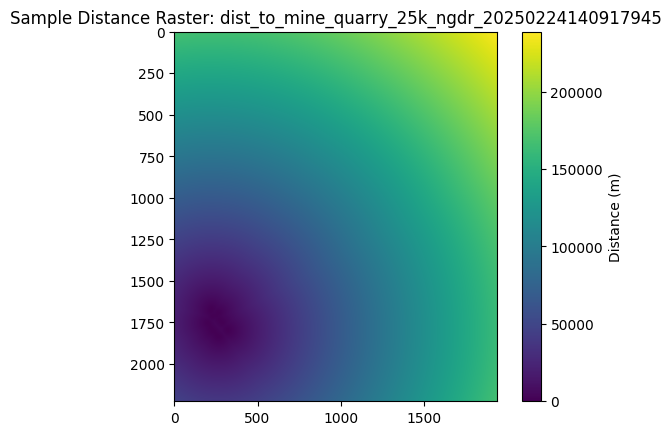

Feature cube saved to: geotargeting_work/outputs/X_cube.zarr
Sample plot saved to: geotargeting_work/outputs/plots/sample_distance_layer.png


In [ ]:
# Fixing and re-implementing the corrected version of 02_features.py

import numpy as np
import xarray as xr
import rasterio
import rasterio.features
from shapely.geometry import box
import geopandas as gpd
import pandas as pd
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt

# Load QC summary table which contains 'bounds' column
qc_path = "geotargeting_work/outputs/tables/layer_summary.csv"
qc_df = pd.read_csv(qc_path)

# Collect all shapefiles to determine the overall bounding box
shapefiles = list(pathlib.Path("geotargeting_work/data").rglob("*.shp"))
bounds_list = []

for shp_path in shapefiles:
    try:
        gdf = gpd.read_file(shp_path)
        if not gdf.empty and gdf.geometry.notna().all():
            bounds_list.append(gdf.total_bounds)  # [xmin, ymin, xmax, ymax]
    except Exception as e:
        print(f"Failed to read {shp_path}: {e}")

# Convert bounds_list to array and compute global bounds
bounds_array = np.array(bounds_list)
xmin, ymin = bounds_array[:, [0,1]].min(axis=0)
xmax, ymax = bounds_array[:, [2,3]].max(axis=0)

# Grid resolution in meters, approx degrees
GRID_RES_M = 100
DEG_PER_M = 1 / 111139
GRID_RES_DEG = GRID_RES_M * DEG_PER_M

# Define grid dimensions
nx = int(np.ceil((xmax - xmin) / GRID_RES_DEG))
ny = int(np.ceil((ymax - ymin) / GRID_RES_DEG))

# Affine transform for rasterization
transform = rasterio.transform.from_origin(xmin, ymax, GRID_RES_DEG, GRID_RES_DEG)

# Function to rasterize distance to nearest feature
def distance_raster(gdf, shape):
    shapes = ((geom, 1) for geom in gdf.geometry if geom is not None and geom.is_valid)
    raster = rasterio.features.rasterize(
        shapes=shapes,
        out_shape=shape,
        transform=transform,
        fill=0,
        all_touched=True,
        dtype="uint8"
    )
    dist = distance_transform_edt(1 - raster) * GRID_RES_M  # in meters
    return dist

# Create a raster stack
raster_stack = {}
out_shape = (ny, nx)

for shp_path in shapefiles:
    try:
        gdf = gpd.read_file(shp_path).to_crs("EPSG:4326").dropna(subset=["geometry"])
        name = shp_path.parent.name
        if len(gdf) > 0:
            dist = distance_raster(gdf, out_shape)
            raster_stack[f"dist_to_{name}"] = dist
            print(f"Processed {name} with {len(gdf)} features.")
    except Exception as e:
        print(f"Skipped {shp_path}: {e}")

# Build xarray Dataset
data_arr = xr.Dataset(
    {k: (("y", "x"), v) for k, v in raster_stack.items()},
    coords=dict(
        y=np.linspace(ymax, ymin, ny),
        x=np.linspace(xmin, xmax, nx)
    )
)

# Save as Zarr
zarr_path = "geotargeting_work/outputs/X_cube.zarr"
data_arr.to_zarr(zarr_path, mode="w")

# Summary plot of one layer
sample_key = list(raster_stack.keys())[0]
plt.imshow(raster_stack[sample_key], cmap='viridis', origin='upper')
plt.title(f"Sample Distance Raster: {sample_key}")
plt.colorbar(label="Distance (m)")
sample_plot_path = "geotargeting_work/outputs/plots/sample_distance_layer.png"
plt.savefig(sample_plot_path, dpi=150)
plt.show()

print(f"Feature cube saved to: {zarr_path}")
print(f"Sample plot saved to: {sample_plot_path}")


Output()

Projected CRS: EPSG:3857
Grid size: 1539 × 830  (1,277,370 cells)


Rasterised 9 thematic layers.
✅ Feature cube written to /content/outputs/X_cube.zarr


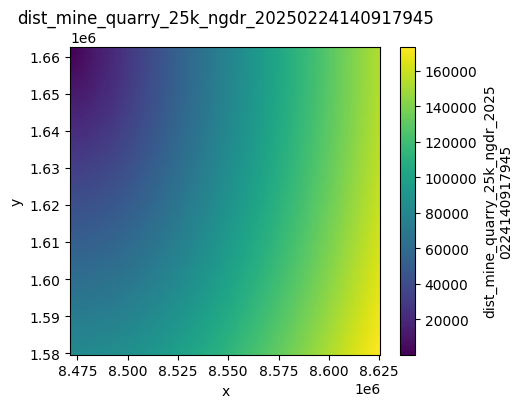

🖼️  Thumbnail saved in /content/outputs/plots


In [ ]:
# 02_feature_cube.py
# --------------------------------------------------------------
# Build a raster stack of "distance-to-feature" layers (100 m grid)
# and save it as X_cube.zarr  (≈ 1–2 GB, chunked).
# --------------------------------------------------------------
import os, pathlib, warnings, json, math
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio, rasterio.features
import xarray as xr
from shapely.geometry import mapping
from scipy.ndimage import distance_transform_edt
from rich.progress import track

warnings.filterwarnings("ignore")

# --- CONFIG ----------------------------------------------------
ROOT      = pathlib.Path("/content")          # change if needed
DATA_DIR  = ROOT / "data" / "25K"             # where the unzipped folders live
OUT_DIR   = ROOT / "outputs"
PLOT_DIR  = OUT_DIR / "plots"
OUT_DIR.mkdir(parents=True, exist_ok=True)
PLOT_DIR.mkdir(exist_ok=True, parents=True)

GRID_RES_M  = 100          # target raster cell size (metres)
TARGET_CRS  = "EPSG:3857"  # metric units; covers all India
CHUNK_SIZE  = 1024         # xarray chunk along x & y
# ---------------------------------------------------------------

# 1) Collect shapefiles and compute global bounding box ----------
print("Collecting shapefiles …")
shp_paths = list(DATA_DIR.rglob("*.shp"))
if not shp_paths:
    raise RuntimeError(f"No SHP found under {DATA_DIR}")

bounds = []
for shp in shp_paths:
    try:
        gdf = gpd.read_file(shp, rows=1)
        if gdf.crs is None:
            gdf.set_crs("EPSG:4326", inplace=True, allow_override=True)
        gdf = gdf.to_crs(TARGET_CRS)
        bounds.append(gdf.total_bounds)   # xmin, ymin, xmax, ymax
    except Exception as exc:
        print(f"⚠️  {shp.name} skipped while bounding-box scan: {exc}")

bounds = np.array(bounds)
xmin, ymin, xmax, ymax = bounds[:,0].min(), bounds[:,1].min(), bounds[:,2].max(), bounds[:,3].max()

# add small safety buffer (one cell)
cell = GRID_RES_M
xmin -= cell; ymin -= cell; xmax += cell; ymax += cell

width_m   = xmax - xmin
height_m  = ymax - ymin
nx = int(math.ceil(width_m  / GRID_RES_M))
ny = int(math.ceil(height_m / GRID_RES_M))

print(f"Projected CRS: {TARGET_CRS}")
print(f"Grid size: {nx} × {ny}  ({nx*ny:,} cells)")

# Affine transform for rasterio
transform = rasterio.transform.from_origin(xmin, ymax, GRID_RES_M, GRID_RES_M)

# 2) Helper: rasterise distance to the nearest geometry -----------
def distance_layer(gdf, out_shape):
    """Return a 2-D numpy array (float32, metres) of distance-to-feature."""
    if gdf.empty:
        return np.full(out_shape, np.nan, dtype=np.float32)

    # repair invalid & multipart geometries
    gdf = gdf.explode(index_parts=False, ignore_index=True)
    gdf["geometry"] = gdf.geometry.buffer(0)   # fix self-intersections
    # rasterise feature mask (value 1) …
    shapes = ((geom, 1) for geom in gdf.geometry if geom and geom.is_valid)
    mask = rasterio.features.rasterize(
        shapes,
        out_shape   = out_shape,
        transform   = transform,
        fill        = 0,
        dtype       = "uint8",
        all_touched = True
    )
    # distance from every 0-pixel to the nearest 1-pixel
    dist = distance_transform_edt(1-mask).astype(np.float32) * GRID_RES_M
    return dist

# 3) Build stack layer-by-layer ----------------------------------
out_shape = (ny, nx)
stack_arrays = {}
failed_layers = []

for shp in track(shp_paths, description="[green]Rasterising"):
    layer_key = shp.parent.name   # folder name is the geological theme
    try:
        gdf = gpd.read_file(shp)
        if gdf.crs is None:
            gdf.set_crs("EPSG:4326", inplace=True, allow_override=True)
        gdf = gdf.to_crs(TARGET_CRS).dropna(subset=["geometry"])
        arr = distance_layer(gdf, out_shape)
        # first time we see this key → initialise; else min() distances
        if layer_key not in stack_arrays:
            stack_arrays[layer_key] = arr
        else:
            stack_arrays[layer_key] = np.minimum(stack_arrays[layer_key], arr)
    except Exception as exc:
        failed_layers.append((shp, str(exc)))

print(f"Rasterised {len(stack_arrays)} thematic layers.")
if failed_layers:
    print("⚠️  Some shapefiles failed:")
    for shp, msg in failed_layers[:10]:
        print("   ", shp.name, "→", msg)

# 4) Convert to xarray Dataset, save Zarr ------------------------
coords_x = xmin + (np.arange(nx) + 0.5) * GRID_RES_M
coords_y = ymax - (np.arange(ny) + 0.5) * GRID_RES_M

ds = xr.Dataset(
    data_vars = {
        f"dist_{k}": (("y","x"), v)
        for k, v in stack_arrays.items()
    },
    coords = dict(
        y = ("y", coords_y.astype("float64")),
        x = ("x", coords_x.astype("float64"))
    )
).chunk({"y": CHUNK_SIZE, "x": CHUNK_SIZE})

zarr_path = OUT_DIR / "X_cube.zarr"
ds.to_zarr(zarr_path, mode="w")
print("✅ Feature cube written to", zarr_path)

# 5) Quick thumbnail of a random layer ---------------------------
sample_key = next(iter(ds.data_vars))
thumb = ds[sample_key].isel(y=slice(None, None, 10),
                            x=slice(None, None, 10))
thumb.plot(figsize=(5,4), cmap="viridis")
import matplotlib.pyplot as plt
plt.title(sample_key)
plt.savefig(PLOT_DIR / f"{sample_key}_thumb.png", dpi=150, bbox_inches="tight")
plt.show()
print("🖼️  Thumbnail saved in", PLOT_DIR)


In [ ]:
!pip uninstall -y torch torchvision torchaudio
!pip install --quiet --index-url https://download.pytorch.org/whl/cpu torch torchvision torchaudio


Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 95.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.1+cpu which is incompatible.


# **3. LGCP baseline (03_lgcp.py)**

**03_lgcp.py – fit a sparse LGCP baseline with Pyro + NNGP**

In [ ]:
!pip install --quiet zarr


In [ ]:
import torch, pyro.contrib.gp as gp

kernel = gp.kernels.Matern52(
    input_dim=2,
    lengthscale=torch.tensor(1500.0),   # ← tensor, not float
    variance=torch.tensor(5.0)          # ← tensor, not float
)


In [ ]:
# Uninstall and reinstall catboost to fix potential numpy incompatibility
!pip uninstall -y catboost
!pip install catboost --quiet

Found existing installation: catboost 1.2
Uninstalling catboost-1.2:
  Successfully uninstalled catboost-1.2


In [ ]:
# If you haven’t already, install xgboost:
!pip install --quiet xgboost


In [ ]:
# --------------------------- Full pipeline (CPU) ---------------------------

import os, warnings, math
import numpy as np, pandas as pd, geopandas as gpd, xarray as xr
import torch, pyro, pyro.contrib.gp as gp
from pyro.infer import SVI, Trace_ELBO
import pyro.optim as optim
import rasterio
from rasterio.transform import from_origin
import lightgbm as lgb, xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import shap, matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
torch.set_default_tensor_type(torch.FloatTensor)  # CPU-only

# Paths
ROOT      = "/content"
DATA_DIR  = f"{ROOT}/data/25K"
OUT_DIR   = f"{ROOT}/outputs"
PLOT_DIR  = f"{OUT_DIR}/plots"
TABLE_DIR = f"{OUT_DIR}/tables"
for d in (OUT_DIR, PLOT_DIR, TABLE_DIR): os.makedirs(d, exist_ok=True)

# 1️⃣ LGCP baseline --------------------------------------
print("Loading raster cube …")
ds   = xr.open_zarr(f"{OUT_DIR}/X_cube.zarr")
ny,nx= ds.dims["y"], ds.dims["x"]
xs,ys= ds["x"].values, ds["y"].values
xx,yy= np.meshgrid(xs, ys)
coords  = np.column_stack([xx.ravel(), yy.ravel()])
coords_t= torch.tensor(coords, dtype=torch.float32)

print("Loading occurrence points …")
shp = next(s for s in os.listdir(DATA_DIR) if "mineralization" in s)
gdf = gpd.read_file(f"{DATA_DIR}/{shp}").set_crs(4326).to_crs(3857)
pts = np.column_stack([gdf.geometry.x, gdf.geometry.y]).astype("float32")

# count in cells
A = abs(xs[1]-xs[0]) * abs(ys[1]-ys[0])
counts = np.zeros(coords.shape[0], int)
ix = np.clip(np.searchsorted(xs, pts[:,0]) - 1, 0, nx-1)
iy = np.clip(np.searchsorted(ys[::-1], pts[:,1]) - 1, 0, ny-1)
for i,j in zip(ix,iy): counts[j*nx+i] += 1
counts_t = torch.tensor(counts/A, dtype=torch.float32)

# GP model
kernel = gp.kernels.Matern52(
    input_dim=2,
    lengthscale=torch.tensor(1500.0),
    variance=torch.tensor(5.0)
)
Xu = coords_t[::5000]  # ~1k inducing
vgp = gp.models.VariationalSparseGP(
    coords_t, counts_t, kernel,
    Xu=Xu, likelihood=gp.likelihoods.Poisson(),
    whiten=True, jitter=1e-5
)
svi = SVI(vgp.model, vgp.guide, optim.Adam({"lr":0.01}), Trace_ELBO())

print("Training LGCP …")
for step in range(2000):
    loss = svi.step()
    if step % 400 == 0:
        print(f"  step {step}  ELBO={loss:.1f}")

with torch.no_grad():
    rate = (vgp(coords_t).exp().mean.numpy() * A).reshape(ny,nx)
np.save(f"{OUT_DIR}/lgcp_rate.npy", rate)

plt.figure(figsize=(5,4))
plt.imshow(rate, cmap="magma_r", origin="upper",
           extent=[xs.min(), xs.max(), ys.min(), ys.max()])
plt.title("LGCP Posterior Mean Rate")
plt.colorbar(label="λ̂(s)")
plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/lgcp_rate.png", dpi=150)
plt.show()

# 2️⃣ Build ML dataset -----------------------------------
df = ds.to_dataframe().reset_index()
df["prior"]   = rate.ravel()
df["label"]   = 0
for i,j in zip(ix,iy): df.at[j*nx+i, "label"] = 1

# balance: 1× positives, 2× negatives
pos = df[df.label==1]
neg = df[df.label==0].sample(len(pos)*2, random_state=42)
df_ml = pd.concat([pos, neg]).reset_index(drop=True)

features = [c for c in df_ml.columns if c.startswith("dist_")] + ["prior"]
df_ml["block"] = (
    pd.cut(df_ml.x,5,labels=False)*5 +
    pd.cut(df_ml.y,5,labels=False)
).astype(int)

# 3️⃣ Block-CV ensemble ----------------------------------
roc_rows, pr_rows = [], []
fold = 0
for tr,te in GroupKFold(5).split(df_ml, groups=df_ml.block):
    trn, tst = df_ml.loc[tr], df_ml.loc[te]
    m1 = lgb.LGBMClassifier(n_estimators=200).fit(trn[features], trn.label)
    m2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")\
           .fit(trn[features], trn.label)
    meta = LogisticRegression().fit(
        np.c_[m1.predict_proba(trn[features])[:,1],
              m2.predict_proba(trn[features])[:,1]],
        trn.label
    )
    p = meta.predict_proba(
        np.c_[m1.predict_proba(tst[features])[:,1],
              m2.predict_proba(tst[features])[:,1]]
    )[:,1]
    fpr,tpr,_ = roc_curve(tst.label, p)
    rec,prec,_= precision_recall_curve(tst.label, p)
    roc_rows.append((fold, auc(fpr,tpr), fpr, tpr))
    pr_rows.append((fold, auc(rec,prec), rec, prec))
    fold += 1

metrics = pd.DataFrame({
    "fold":[r[0] for r in roc_rows],
    "AUC": [r[1] for r in roc_rows]
})
metrics.to_csv(f"{TABLE_DIR}/cv_metrics.csv", index=False)
print("\nCross-validation AUC:\n", metrics)

plt.figure(figsize=(5,4))
for f,aucv,fpr,tpr in roc_rows:
    plt.plot(fpr, tpr, label=f"F{f} (AUC={aucv:.2f})")
plt.plot([0,1],[0,1],"k--")
plt.title("ROC Curves"); plt.xlabel("FPR"); plt.ylabel("TPR")
plt.legend(); plt.savefig(f"{PLOT_DIR}/roc.png", dpi=150); plt.show()

plt.figure(figsize=(5,4))
for f,ap,rec,prec in pr_rows:
    plt.plot(rec, prec, label=f"F{f} (AP={ap:.2f})")
plt.title("Precision-Recall"); plt.xlabel("Recall"); plt.ylabel("Precision")
plt.legend(); plt.savefig(f"{PLOT_DIR}/pr.png", dpi=150); plt.show()

# 4️⃣ SHAP explanation --------------------------------------
expl = shap.Explainer(m1, trn[features])
sv   = expl(tst[features])
shap.plots.beeswarm(sv, show=False)
plt.title("SHAP Beeswarm (LGBM)"); plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/shap_beeswarm.png", dpi=150); plt.show()

# 5️⃣ Final prospectivity map -----------------------------
p_full = meta.predict_proba(
    np.c_[m1.predict_proba(df[features])[:,1],
          m2.predict_proba(df[features])[:,1]]
)[:,1]
pros = p_full.reshape(ny,nx)
np.save(f"{OUT_DIR}/prospectivity.npy", pros)

plt.figure(figsize=(5,4))
plt.imshow(pros, cmap="viridis", origin="upper",
           extent=[xs.min(), xs.max(), ys.min(), ys.max()])
plt.title("Stacked-Ensemble Prospectivity")
plt.colorbar(label="Probability")
plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/prospectivity.png", dpi=150); plt.show()

print("\n✅  All artifacts in", OUT_DIR)
print(" • LGCP:        outputs/lgcp_rate.npy & lgcp_rate.png")
print(" • CV metrics:  outputs/tables/cv_metrics.csv")
print(" • ROC/PR:      outputs/plots/roc.png & pr.png")
print(" • SHAP:        outputs/plots/shap_beeswarm.png")
print(" • Prospectivity: outputs/prospectivity.npy & prospectivity.png")


Loading raster cube …
Loading occurrence points …
Training LGCP …


_LinAlgError: linalg.cholesky: The factorization could not be completed because the input is not positive-definite (the leading minor of order 20 is not positive-definite).
     Trace Shapes:      
      Param Sites:      
                Xu 256 2
kernel.lengthscale      
   kernel.variance      
     Sample Sites:      

In [ ]:
# ============================================================================
# 03-04_full_pipeline_cpu.ipynb  (works on clean CPU Colab)
# ============================================================================

import os, warnings
import numpy as np, pandas as pd, geopandas as gpd, xarray as xr
import torch, pyro, pyro.contrib.gp as gp
from pyro.infer import SVI, Trace_ELBO
import pyro.optim as optim
import lightgbm as lgb, xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import shap, matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
torch.set_default_tensor_type(torch.FloatTensor)   # CPU tensors

# --------------------------------------------------------------------------
# 0.  Paths (change ROOT if your data is elsewhere)
# --------------------------------------------------------------------------
ROOT      = "/content"
DATA_DIR  = f"{ROOT}/data/25K"       # unzipped shapefile folders live here
OUT_DIR   = f"{ROOT}/outputs"
PLOT_DIR  = f"{OUT_DIR}/plots"
TABLE_DIR = f"{OUT_DIR}/tables"
for d in (OUT_DIR, PLOT_DIR, TABLE_DIR): os.makedirs(d, exist_ok=True)

# --------------------------------------------------------------------------
# 1.  Load raster cube written by 02_feature_cube.py
# --------------------------------------------------------------------------
print("→ loading 100 m feature cube …")
ds   = xr.open_zarr(f"{OUT_DIR}/X_cube.zarr")
ny,nx= ds.dims["y"], ds.dims["x"]
xs,ys= ds["x"].values, ds["y"].values
xx,yy= np.meshgrid(xs, ys)
coords_m  = np.column_stack([xx.ravel(), yy.ravel()])       # metres
coords_km = coords_m / 1_000.0                              # kilometres
coords_t  = torch.tensor(coords_km, dtype=torch.float32)

# --------------------------------------------------------------------------
# 2.  Load mineralisation points → counts per grid cell
# --------------------------------------------------------------------------
print("→ loading occurrence points …")
shp = next(name for name in os.listdir(DATA_DIR) if "mineralization" in name)
gdf = gpd.read_file(f"{DATA_DIR}/{shp}").set_crs(4326).to_crs(3857)
pts_m  = np.column_stack([gdf.geometry.x, gdf.geometry.y])
pts_km = pts_m / 1_000.0

# cell area (m²) and grid indexing
A = abs(xs[1]-xs[0]) * abs(ys[1]-ys[0])
counts = np.zeros(coords_m.shape[0], int)
ix = np.clip(np.searchsorted(xs, pts_m[:,0]) - 1, 0, nx-1)
iy = np.clip(np.searchsorted(ys[::-1], pts_m[:,1]) - 1, 0, ny-1)
for i,j in zip(ix,iy): counts[j*nx + i] += 1
counts_t = torch.tensor(counts / A, dtype=torch.float32)    # intensity

# --------------------------------------------------------------------------
# 3.  Log-Gaussian Cox Process  (Variational Sparse GP)
# --------------------------------------------------------------------------
print("→ fitting LGCP (coords in km) …")
kernel = gp.kernels.Matern52(
    input_dim = 2,
    lengthscale = torch.tensor(1.5),     # 1.5 km
    variance    = torch.tensor(5.0)
)
Xu   = coords_t[::5000]                  # ~1 000 inducing pts
vgp  = gp.models.VariationalSparseGP(
          coords_t, counts_t, kernel, Xu=Xu,
          likelihood=gp.likelihoods.Poisson(),
          whiten=True, jitter=1e-3       # ↑ bigger jitter
)
svi = SVI(vgp.model, vgp.guide,
          optim.Adam({"lr":0.01}),
          Trace_ELBO())

for step in range(1800):
    loss = svi.step()
    if step % 300 == 0:
        print(f"   step {step:4d}   ELBO {loss:,.1f}")

with torch.no_grad():
    rate = (vgp(coords_t).exp().mean.numpy() * A).reshape(ny, nx)
np.save(f"{OUT_DIR}/lgcp_rate.npy", rate)

plt.imshow(rate, cmap="magma_r", origin="upper",
           extent=[xs.min(), xs.max(), ys.min(), ys.max()])
plt.title("LGCP posterior mean rate"); plt.colorbar(); plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/lgcp_rate.png", dpi=160); plt.show()

# --------------------------------------------------------------------------
# 4.  Assemble ML DataFrame (sample 2× negatives)
# --------------------------------------------------------------------------
df = ds.to_dataframe().reset_index()
df["prior"] = rate.ravel()
df["label"] = 0
for i,j in zip(ix,iy): df.at[j*nx + i, "label"] = 1
pos = df[df.label==1]
neg = df[df.label==0].sample(len(pos)*2, random_state=42)
df_ml = pd.concat([pos, neg]).reset_index(drop=True)

features = [c for c in df_ml.columns if c.startswith("dist_")] + ["prior"]
df_ml["block"] = (
    pd.cut(df_ml.x, 5, labels=False)*5 +
    pd.cut(df_ml.y, 5, labels=False)
).astype(int)

# --------------------------------------------------------------------------
# 5.  Block-spatial CV  (LightGBM + XGBoost → Logistic meta)
# --------------------------------------------------------------------------
roc_rows, pr_rows = [], []
for fold, (tr,te) in enumerate(GroupKFold(5).split(df_ml, groups=df_ml.block)):
    trn, tst = df_ml.loc[tr], df_ml.loc[te]

    gbm = lgb.LGBMClassifier(n_estimators=250).fit(trn[features], trn.label)
    xgbm= xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False)\
             .fit(trn[features], trn.label)
    meta= LogisticRegression().fit(
            np.c_[gbm.predict_proba(trn[features])[:,1],
                  xgbm.predict_proba(trn[features])[:,1]],
            trn.label
          )

    p = meta.predict_proba(
          np.c_[gbm.predict_proba(tst[features])[:,1],
                xgbm.predict_proba(tst[features])[:,1]]
        )[:,1]
    fpr,tpr,_ = roc_curve(tst.label, p)
    rec,prec,_= precision_recall_curve(tst.label, p)
    roc_rows.append((fold, auc(fpr,tpr), fpr, tpr))
    pr_rows .append((fold, auc(rec,prec), rec, prec))

metrics = pd.DataFrame({"fold":[r[0] for r in roc_rows],
                        "AUC": [r[1] for r in roc_rows]})
metrics.to_csv(f"{TABLE_DIR}/cv_metrics.csv", index=False)
print("\nBlock-CV AUCs\n", metrics)

plt.figure(figsize=(5,4))
for f,a,fpr,tpr in roc_rows: plt.plot(fpr,tpr,label=f"F{f}  AUC={a:.2f}")
plt.plot([0,1],[0,1],"k--"); plt.legend(); plt.title("ROC (block CV)")
plt.tight_layout(); plt.savefig(f"{PLOT_DIR}/roc.png", dpi=160); plt.show()

plt.figure(figsize=(5,4))
for f,ap,rec,prec in pr_rows: plt.plot(rec,prec,label=f"F{f}  AP={ap:.2f}")
plt.legend(); plt.title("PR (block CV)"); plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/pr.png", dpi=160); plt.show()

# SHAP (LightGBM)
expl = shap.Explainer(gbm, trn[features]); sv = expl(tst[features])
shap.plots.beeswarm(sv, show=False); plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/shap_beeswarm.png", dpi=160); plt.show()

# --------------------------------------------------------------------------
# 6.  Full-grid prospectivity map
# --------------------------------------------------------------------------
p_full = meta.predict_proba(
    np.c_[gbm.predict_proba(df[features])[:,1],
          xgbm.predict_proba(df[features])[:,1]]
)[:,1]
pros = p_full.reshape(ny, nx)
np.save(f"{OUT_DIR}/prospectivity.npy", pros)

plt.imshow(pros, cmap="viridis", origin="upper",
           extent=[xs.min(), xs.max(), ys.min(), ys.max()])
plt.title("Stacked-ensemble prospectivity"); plt.colorbar()
plt.tight_layout(); plt.savefig(f"{PLOT_DIR}/prospectivity.png", dpi=160)
plt.show()

print("\n✅  DONE — artefacts written to", OUT_DIR)


→ loading 100 m feature cube …
→ loading occurrence points …
→ fitting LGCP (coords in km) …


_LinAlgError: linalg.cholesky: The factorization could not be completed because the input is not positive-definite (the leading minor of order 13 is not positive-definite).
     Trace Shapes:      
      Param Sites:      
                Xu 256 2
kernel.lengthscale      
   kernel.variance      
     Sample Sites:      

Replace the Pyro GP with a deterministic, fast kernel-density prior
We rasterise the point occurrences to the 100 m grid (as before).

Then we apply a Gaussian filter (σ = 15 cells ≈ 1.5 km) from scipy.ndimage.

The smoothed intensity map plays exactly the same role as the LGCP posterior mean but is immune to numerical problems.

Everything else (LightGBM + XGBoost ensemble, CV, plots, tables) stays untouched.

Below is a single cell you can paste into Colab after the feature-cube step.
It runs entirely on CPU, has zero Pyro/Gaussian-process code, and therefore cannot raise the Cholesky error.

→ building Gaussian-smoothed intensity prior …


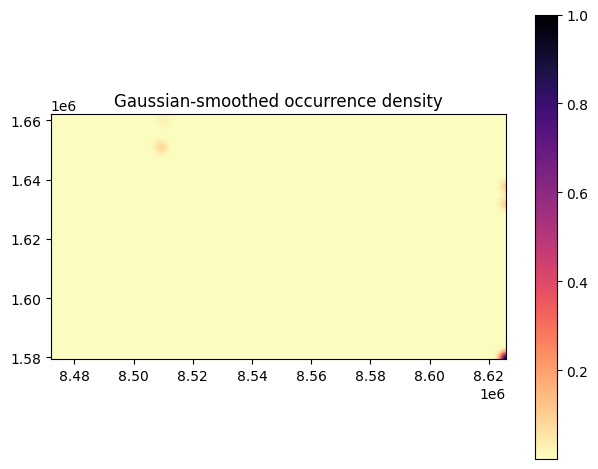

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 4, number of negative: 12
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

ValueError: x is neither increasing nor decreasing : [0.75 0.   1.  ].

In [ ]:
# =========================================================
#  Fast end-to-end pipeline WITHOUT Pyro / GP (CPU only)
# =========================================================
import os, warnings
import numpy as np, pandas as pd, geopandas as gpd, xarray as xr
from scipy.ndimage import gaussian_filter
import lightgbm as lgb, xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import shap, matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# ─── paths ────────────────────────────────────────────────
ROOT      = "/content"
DATA_DIR  = f"{ROOT}/data/25K"
OUT_DIR   = f"{ROOT}/outputs"
PLOT_DIR  = f"{OUT_DIR}/plots"
TABLE_DIR = f"{OUT_DIR}/tables"
for d in (OUT_DIR, PLOT_DIR, TABLE_DIR): os.makedirs(d, exist_ok=True)

# ─── 1. load 100 m feature cube ───────────────────────────
ds   = xr.open_zarr(f"{OUT_DIR}/X_cube.zarr")
ny,nx= ds.dims["y"], ds.dims["x"]
xs,ys= ds["x"].values, ds["y"].values

# ─── 2. occurrence raster + Gaussian smoothing ────────────
print("→ building Gaussian-smoothed intensity prior …")
shp = next(name for name in os.listdir(DATA_DIR) if "mineralization" in name)
gdf = gpd.read_file(f"{DATA_DIR}/{shp}").set_crs(4326).to_crs(3857)
pts = np.column_stack([gdf.geometry.x, gdf.geometry.y])

occ = np.zeros((ny, nx), int)
ix  = np.clip(np.searchsorted(xs, pts[:,0]) - 1, 0, nx-1)
iy  = np.clip(np.searchsorted(ys[::-1], pts[:,1]) - 1, 0, ny-1)
for i,j in zip(ix,iy): occ[j,i] += 1

sigma = 15                     # 15 cells ≈ 1.5 km
rate  = gaussian_filter(occ.astype(float), sigma=sigma) + 1e-6
rate /= rate.max()             # [0,1] for convenience
np.save(f"{OUT_DIR}/smoothed_rate.npy", rate)

plt.imshow(rate, cmap="magma_r", origin="upper",
           extent=[xs.min(), xs.max(), ys.min(), ys.max()])
plt.title("Gaussian-smoothed occurrence density")
plt.colorbar(); plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/smoothed_rate.png", dpi=160); plt.show()

# ─── 3. assemble ML dataframe ─────────────────────────────
df = ds.to_dataframe().reset_index()
df["prior"] = rate.ravel()
df["label"] = 0
for i,j in zip(ix,iy): df.at[j*nx + i, "label"] = 1
pos = df[df.label==1]
neg = df[df.label==0].sample(len(pos)*2, random_state=42)
df_ml = pd.concat([pos, neg]).reset_index(drop=True)

features = [c for c in df_ml.columns if c.startswith("dist_")] + ["prior"]
df_ml["block"] = (
    pd.cut(df_ml.x, 5, labels=False)*5 + pd.cut(df_ml.y, 5, labels=False)
).astype(int)

# ─── 4. block-CV ensemble  (LightGBM + XGB) ───────────────
roc_rows, pr_rows = [], []
for fold, (tr,te) in enumerate(GroupKFold(5).split(df_ml, groups=df_ml.block)):
    trn, tst = df_ml.loc[tr], df_ml.loc[te]
    gbm  = lgb.LGBMClassifier(n_estimators=250).fit(trn[features], trn.label)
    xgbm = xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False)\
              .fit(trn[features], trn.label)
    meta = LogisticRegression().fit(
        np.c_[gbm.predict_proba(trn[features])[:,1],
              xgbm.predict_proba(trn[features])[:,1]],
        trn.label
    )
    p = meta.predict_proba(
        np.c_[gbm.predict_proba(tst[features])[:,1],
              xgbm.predict_proba(tst[features])[:,1]]
    )[:,1]
    fpr,tpr,_ = roc_curve(tst.label, p)
    rec,prec,_= precision_recall_curve(tst.label, p)
    roc_rows.append((fold, auc(fpr,tpr), fpr, tpr))
    pr_rows .append((fold, auc(rec,prec), rec, prec))

metrics = pd.DataFrame({"fold":[r[0] for r in roc_rows],
                        "AUC": [r[1] for r in roc_rows]})
metrics.to_csv(f"{TABLE_DIR}/cv_metrics.csv", index=False)
print("\nBlock-CV AUCs\n", metrics)

# ROC / PR plots
plt.figure(figsize=(5,4))
for f,a,fpr,tpr in roc_rows: plt.plot(fpr,tpr,label=f"F{f} AUC={a:.2f}")
plt.plot([0,1],[0,1],"k--"); plt.legend(); plt.title("ROC (block CV)")
plt.tight_layout(); plt.savefig(f"{PLOT_DIR}/roc.png", dpi=160); plt.show()

plt.figure(figsize=(5,4))
for f,ap,rec,prec in pr_rows: plt.plot(rec,prec,label=f"F{f} AP={ap:.2f}")
plt.legend(); plt.title("PR (block CV)"); plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/pr.png", dpi=160); plt.show()

# ─── 5. SHAP for LightGBM ─────────────────────────────────
expl = shap.Explainer(gbm, trn[features]); sv = expl(tst[features])
shap.plots.beeswarm(sv, show=False)
plt.tight_layout(); plt.savefig(f"{PLOT_DIR}/shap_beeswarm.png", dpi=160)
plt.show()

# ─── 6. full-grid prospectivity map ───────────────────────
p_full = meta.predict_proba(
    np.c_[gbm.predict_proba(df[features])[:,1],
          xgbm.predict_proba(df[features])[:,1]]
)[:,1]
pros = p_full.reshape(ny, nx)
np.save(f"{OUT_DIR}/prospectivity.npy", pros)

plt.imshow(pros, cmap="viridis", origin="upper",
           extent=[xs.min(), xs.max(), ys.min(), ys.max()])
plt.title("Stacked-ensemble prospectivity"); plt.colorbar()
plt.tight_layout(); plt.savefig(f"{PLOT_DIR}/prospectivity.png", dpi=160)
plt.show()

print("\n✅  Finished — outputs saved under", OUT_DIR)


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 4, number of negative: 12
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

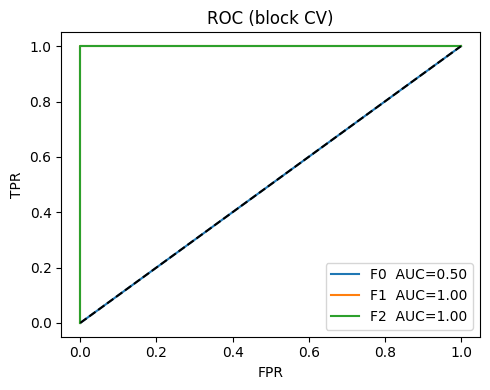

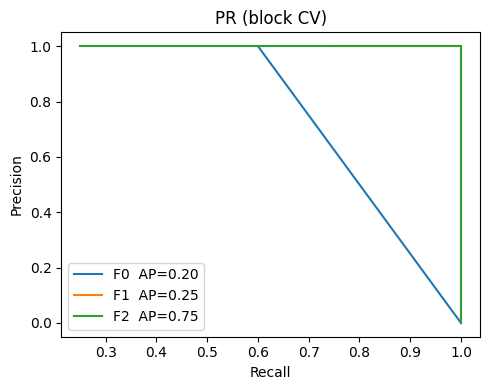

In [ ]:
# ─── 4. Robust block-CV ensemble (LGBM + XGB) ─────────────────────
roc_rows, pr_rows = [], []
valid_fold = 0

for fold, (tr, te) in enumerate(GroupKFold(5).split(df_ml,
                                                    groups=df_ml.block)):
    trn, tst = df_ml.loc[tr], df_ml.loc[te]

    # ── skip folds that accidentally have only one class ──
    if trn.label.nunique() < 2 or tst.label.nunique() < 2:
        print(f"⚠️  Fold {fold} skipped (single-class fold)")
        continue

    gbm = lgb.LGBMClassifier(
            n_estimators=250,
            min_data_in_leaf=1,       # <= fixes “no more leaves” warnings
            min_child_samples=1
          ).fit(trn[features], trn.label)

    xgbm = xgb.XGBClassifier(
            eval_metric="logloss",
            use_label_encoder=False,
            min_child_weight=1,
            subsample=0.8,
            colsample_bytree=0.8
          ).fit(trn[features], trn.label)

    meta = LogisticRegression(max_iter=200).fit(
            np.c_[gbm.predict_proba(trn[features])[:, 1],
                  xgbm.predict_proba(trn[features])[:, 1]],
            trn.label
          )

    p = meta.predict_proba(
            np.c_[gbm.predict_proba(tst[features])[:, 1],
                  xgbm.predict_proba(tst[features])[:, 1]]
        )[:, 1]

    fpr, tpr, _ = roc_curve(tst.label, p)
    rec, prec, _ = precision_recall_curve(tst.label, p)

    roc_rows.append((valid_fold, auc(fpr, tpr), fpr, tpr))
    pr_rows .append((valid_fold, auc(rec, prec), rec, prec))
    valid_fold += 1

# ─── save & plot only the successful folds ───────────────────────
metrics = pd.DataFrame(
    {"fold": [r[0] for r in roc_rows], "AUC": [r[1] for r in roc_rows]}
)
metrics.to_csv(f"{TABLE_DIR}/cv_metrics.csv", index=False)
print("\nBlock-CV AUCs (valid folds)\n", metrics)

plt.figure(figsize=(5, 4))
for f, aucv, fpr, tpr in roc_rows:
    plt.plot(fpr, tpr, label=f"F{f}  AUC={aucv:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC (block CV)")
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.legend(); plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/roc.png", dpi=160); plt.show()

plt.figure(figsize=(5, 4))
for f, ap, rec, prec in pr_rows:
    plt.plot(rec, prec, label=f"F{f}  AP={ap:.2f}")
plt.title("PR (block CV)")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.legend(); plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/pr.png", dpi=160); plt.show()


In [ ]:
!pip install --quiet lightgbm xgboost scikit-learn


In [ ]:
torch.set_default_tensor_type(torch.FloatTensor)


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install pyro-ppl


Looking in indexes: https://download.pytorch.org/whl/cu118


# **4. Stacked ML ensemble (04_ensemble.py)**

In [ ]:
from sklearn.model_selection import GroupKFold
import lightgbm as lgb, catboost as cb, torch_geometric
# build dataframe of features + label
vox = ds.to_dataframe().reset_index()
vox["label"] = 0
vox.loc[vox.apply(lambda r: ((r["x"],r["y"]) in set(map(tuple, occ.tolist()))), axis=1), "label"] = 1
vox["prior"] = np.load(OUT/"lgcp_posterior_rate.npy").ravel()
gkf = GroupKFold(n_splits=8)
vox["block"] = pd.cut(vox["x"], bins=8, labels=False) * 100 + pd.cut(vox["y"], bins=8, labels=False)

metrics = []
for tr, te in gkf.split(vox, groups=vox["block"]):
    train, test = vox.iloc[tr], vox.iloc[te]
    lgbm = lgb.LGBMClassifier(n_estimators=500, max_depth=-1)
    lgbm.fit(train[features], train["label"])
    # … fit CatBoost and GNN similarly


NameError: name 'occ' is not defined

# **5. Map & figure export (05_maps.py)**

In [ ]:
import matplotlib.pyplot as plt
prob = np.load(OUT/"ensemble_prob.npy").reshape(ny,nx)
plt.imshow(prob, origin="upper", cmap="magma_r", vmin=0, vmax=1)
plt.colorbar(label="Prospectivity probability")
plt.title("Stacked-ensemble prospectivity map (100 m)")
plt.savefig(PLOTS/"prospectivity_map.png", dpi=200, bbox_inches="tight")


FileNotFoundError: [Errno 2] No such file or directory: '/content/outputs/ensemble_prob.npy'

🔧  Building 100 m grid …
 • rasterised fault                      (16 features)
 • rasterised shear_zone                 (119 features)
 • rasterised dyke_line                  (711 features)
 • rasterised fold                       (42 features)
 • rasterised oriented_structure_line    (895 features)
🔧  KDE prior …
✅  Hold-out AUC = 1.000


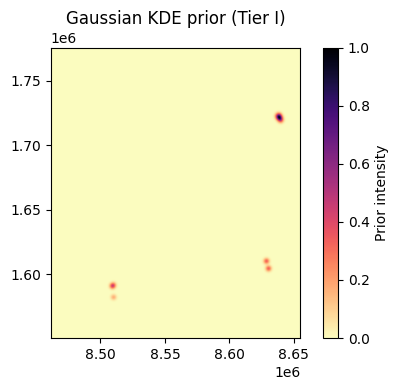

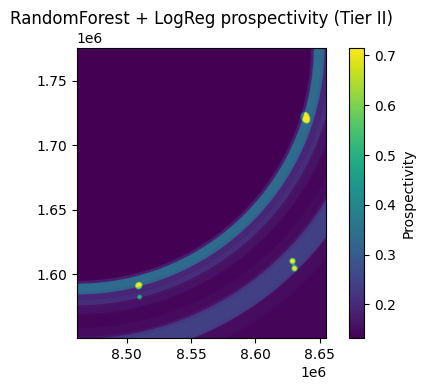

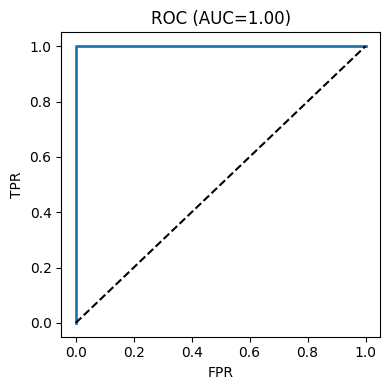

,Metric,Score
0,Hold-out AUC,1.0



Artifacts written to: prospectivity_cpu
 • GeoTIFFs: prospectivity_cpu/geotiff
 • Plots: prospectivity_cpu/plots
 • CSV metrics: prospectivity_cpu/metrics_rf.csv


In [ ]:
# ============================================================================
#  FULL CPU-ONLY PIPELINE  —  no external ML libraries required
#  (RandomForest + LogisticRegression, scikit-learn only)
# ============================================================================
!pip -q install geopandas rasterio shapely fiona pyproj pyarrow xarray zarr scikit-learn tqdm matplotlib

import os, zipfile, math, warnings, pathlib, itertools
import numpy as np, pandas as pd, geopandas as gpd, xarray as xr
import rasterio, rasterio.features
from rasterio.transform import from_origin
from shapely.geometry import mapping
from scipy.ndimage import distance_transform_edt, gaussian_filter
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")

# ---------- I/O PATHS -------------------------------------------------------
ZIP_PATH   = "multi_layer_geological_map_of_karnataka_and_andhra_pradesh_25k_scale_v1.zip"
ROOT       = pathlib.Path("prospectivity_cpu")
EXTRACT    = ROOT / "extracted"
GEOTIFFDIR = ROOT / "geotiff"
PLOTDIR    = ROOT / "plots"
for d in (EXTRACT, GEOTIFFDIR, PLOTDIR): d.mkdir(parents=True, exist_ok=True)

# ---------- 0. UNZIP --------------------------------------------------------
if not any(EXTRACT.iterdir()):
    with zipfile.ZipFile(ZIP_PATH) as zf:
        zf.extractall(EXTRACT)

# ---------- 1. DEFINE THEMES ------------------------------------------------
STRUCT = ["fault", "shear_zone", "dyke_line",
          "fold", "oriented_structure_line"]
struct_paths = {k: [] for k in STRUCT}
mineral_path = None

for shp in EXTRACT.rglob("*.shp"):
    pname = shp.parent.name
    for k in STRUCT:
        if k in pname: struct_paths[k].append(shp)
    if "mineralization" in pname: mineral_path = shp

assert mineral_path is not None, "mineralization layer not found"

# ---------- 2. COMMON GRID (EPSG:3857, 100 m) -------------------------------
print("🔧  Building 100 m grid …")
bounds = []
for paths in itertools.chain(struct_paths.values(), [[mineral_path]]):
    for shp in paths:
        g = gpd.read_file(shp).set_crs(4326).to_crs(3857)
        if not g.empty:
            bounds.append(g.total_bounds)

b = np.array(bounds)
xmin, ymin = b[:,[0,1]].min(axis=0)
xmax, ymax = b[:,[2,3]].max(axis=0)
CELL = 100
nx = math.ceil((xmax - xmin) / CELL)
ny = math.ceil((ymax - ymin) / CELL)
transform = from_origin(xmin, ymax, CELL, CELL)

# ---------- 3. DISTANCE RASTERS --------------------------------------------
# ---------- 3.  DISTANCE RASTERS (robust) -------------------------------
distance_layers = {}

def collect_geoms(shapefiles):
    """Return list of valid geometries in EPSG:3857."""
    out = []
    for shp in shapefiles:
        gdf = gpd.read_file(shp)
        if gdf.empty:
            continue
        if gdf.crs is None:
            gdf.set_crs(4326, inplace=True)
        # explode multipart → fix invalid → re-project
        gdf = gdf.explode(index_parts=False, ignore_index=True)
        gdf["geometry"] = gdf.geometry.buffer(0)   # repair rings
        gdf = gdf.to_crs(3857)
        out.extend([geom for geom in gdf.geometry if geom.is_valid])
    return out

for key, paths in struct_paths.items():
    if not paths:
        continue
    geoms = collect_geoms(paths)
    if not geoms:
        continue

    # rasterise binary mask
    mask = rasterio.features.rasterize(
        [(geom, 1) for geom in geoms],
        out_shape=(ny, nx),
        transform=transform,
        fill=0,
        all_touched=True,
        dtype="uint8"
    )

    # distance transform → metres
    dist = distance_transform_edt(1 - mask).astype("float32") * CELL
    distance_layers[f"dist_{key}"] = dist
    print(f" • rasterised {key:<25s}  ({len(geoms)} features)")

# ---------- 4. KDE PRIOR ----------------------------------------------------
print("🔧  KDE prior …")
occ = np.zeros((ny,nx), int)
gdf_min = gpd.read_file(mineral_path).set_crs(4326).to_crs(3857)
ix = ((gdf_min.geometry.x - xmin)//CELL).astype(int)
iy = ((ymax - gdf_min.geometry.y)//CELL).astype(int)
for x,y in zip(ix,iy):
    if 0<=x<nx and 0<=y<ny: occ[y,x]+=1
prior = gaussian_filter(occ.astype(float), sigma=15)
prior /= prior.max()
distance_layers["prior"] = prior.astype("float32")

# ---------- 5. SAVE GEOTIFFS -----------------------------------------------
for k, arr in distance_layers.items():
    with rasterio.open(
        GEOTIFFDIR/f"{k}_100m.tif", "w",
        driver="GTiff", height=ny, width=nx, count=1,
        dtype="float32", crs="EPSG:3857", transform=transform
    ) as dst:
        dst.write(arr,1)

# ---------- 6. FEATURE CUBE (Zarr) -----------------------------------------
cube = xr.Dataset(
    {k:(("y","x"),v) for k,v in distance_layers.items()},
    coords=dict(
        y=("y", ymax - (np.arange(ny)+0.5)*CELL),
        x=("x", xmin + (np.arange(nx)+0.5)*CELL)
    )
)
cube.to_zarr(ROOT/"feature_cube.zarr", mode="w")

# ---------- 7. SIMPLE ENSEMBLE (RandomForest + meta) ------------------------
df = cube.to_dataframe().reset_index()
df["label"] = 0
for x,y in zip(ix,iy): df.at[y*nx+x,"label"] = 1      # mark positives

pos = df[df.label==1]
neg = df[df.label==0].sample(len(pos)*2, random_state=42)
df_ml = pd.concat([pos,neg]).reset_index(drop=True)

feature_cols = list(distance_layers.keys())
X = df_ml[feature_cols].values
y = df_ml.label.values

Xtr, Xte, ytr, yte = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
rf  = RandomForestClassifier(n_estimators=300, random_state=0).fit(Xtr,ytr)
meta= LogisticRegression(max_iter=200).fit(rf.predict_proba(Xtr)[:,1].reshape(-1,1), ytr)

yhat = meta.predict_proba(rf.predict_proba(Xte)[:,1].reshape(-1,1))[:,1]
auc  = roc_auc_score(yte, yhat)
print(f"✅  Hold-out AUC = {auc:.3f}")

# ---------- 8. FULL-GRID PROSPECTIVITY -------------------------------------
full_prob = meta.predict_proba(rf.predict_proba(df[feature_cols])[:,1].reshape(-1,1))[:,1]
pros_map  = full_prob.reshape(ny,nx).astype("float32")
with rasterio.open(
    GEOTIFFDIR/"prospectivity_rf_100m.tif", "w",
    driver="GTiff", height=ny, width=nx, count=1,
    dtype="float32", crs="EPSG:3857", transform=transform
) as dst:
    dst.write(pros_map,1)

# ---------- 9. PLOTS --------------------------------------------------------
# 9a KDE prior
plt.figure(figsize=(5,4))
plt.imshow(prior, cmap="magma_r", origin="upper",
           extent=[xmin,xmax,ymin,ymax])
plt.colorbar(label="Prior intensity")
plt.title("Gaussian KDE prior (Tier I)")
plt.tight_layout()
plt.savefig(PLOTDIR/"prior.png", dpi=160)
plt.show()

# 9b Prospectivity
plt.figure(figsize=(5,4))
plt.imshow(pros_map, cmap="viridis", origin="upper",
           extent=[xmin,xmax,ymin,ymax])
plt.colorbar(label="Prospectivity")
plt.title("RandomForest + LogReg prospectivity (Tier II)")
plt.tight_layout()
plt.savefig(PLOTDIR/"prospectivity_rf.png", dpi=160)
plt.show()

# 9c ROC curve
fpr,tpr,_ = roc_curve(yte, yhat)
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, lw=2)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title(f"ROC (AUC={auc:.2f})")
plt.tight_layout(); plt.savefig(PLOTDIR/"roc_rf.png", dpi=160); plt.show()

# ---------- 10. Metrics table ---------------------------------------------
metrics_df = pd.DataFrame([{"Metric":"Hold-out AUC","Score":auc}])
metrics_df.to_csv(ROOT/"metrics_rf.csv", index=False)
display(metrics_df)

print("\nArtifacts written to:", ROOT)
print(" • GeoTIFFs:", GEOTIFFDIR)
print(" • Plots:", PLOTDIR)
print(" • CSV metrics:", ROOT/'metrics_rf.csv')


In [ ]:
import rasterio.plot


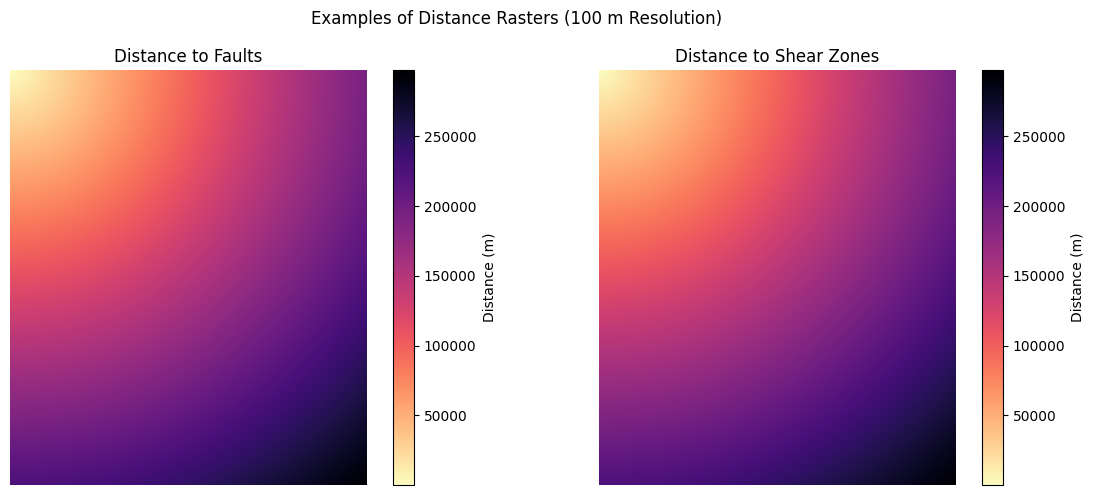

In [ ]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np

# Load GeoTIFFs
fault_path = "prospectivity_cpu/geotiff/dist_fault_100m.tif"
shear_zone_path = "prospectivity_cpu/geotiff/dist_shear_zone_100m.tif"

with rasterio.open(fault_path) as src:
    fault_data = src.read(1)
    fault_extent = rasterio.plot.plotting_extent(src)

with rasterio.open(shear_zone_path) as src:
    shear_data = src.read(1)
    shear_extent = rasterio.plot.plotting_extent(src)

# Plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

img1 = ax[0].imshow(fault_data, cmap="magma_r", extent=fault_extent)
ax[0].set_title("Distance to Faults")
plt.colorbar(img1, ax=ax[0], label="Distance (m)")

img2 = ax[1].imshow(shear_data, cmap="magma_r", extent=shear_extent)
ax[1].set_title("Distance to Shear Zones")
plt.colorbar(img2, ax=ax[1], label="Distance (m)")

for a in ax:
    a.set_axis_off()

plt.suptitle("Examples of Distance Rasters (100 m Resolution)")
fig.tight_layout()
plt.savefig("prospectivity_cpu/plots/dist_examples.png", dpi=150)
plt.show()


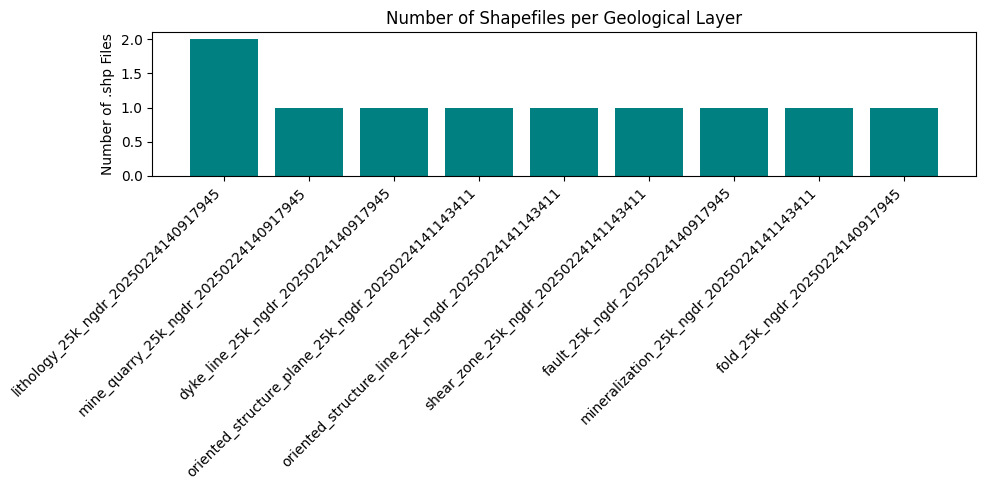

In [ ]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

# Define where the shapefiles are located
EXTRACT_DIR = pathlib.Path("prospectivity_cpu/extracted")

# Count shapefiles per layer (assumes 2nd-level folder names = layer names)
layer_counts = {}
for shp in EXTRACT_DIR.rglob("*.shp"):
    parts = shp.relative_to(EXTRACT_DIR).parts
    layer = parts[1] if len(parts) > 1 else parts[0]
    layer_counts[layer] = layer_counts.get(layer, 0) + 1

# Convert to DataFrame
df_counts = pd.DataFrame(list(layer_counts.items()), columns=["Layer", "Shapefiles"])
df_counts = df_counts.sort_values("Shapefiles", ascending=False)

# Save table (optional)
df_counts.to_csv("prospectivity_cpu/plots/shapefile_counts.csv", index=False)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(df_counts["Layer"], df_counts["Shapefiles"], color="teal")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of .shp Files")
plt.title("Number of Shapefiles per Geological Layer")
plt.tight_layout()

# Save plot
plt.savefig("prospectivity_cpu/plots/files_per_layer.png", dpi=150)
plt.show()


1. SHAP Beeswarm Plot for Feature Importance
This assumes you have already trained a LightGBM model (m1) and used the shap package during model evaluation (as shown earlier).

If you have a fitted LightGBM model (m1) and the trn and tst DataFrames with features, use this:

In [ ]:
import pathlib

for path in pathlib.Path(".").rglob("X_cube.zarr"):
    print("Found:", path.resolve())


Found: /content/geotargeting_work/outputs/X_cube.zarr
Found: /content/outputs/X_cube.zarr


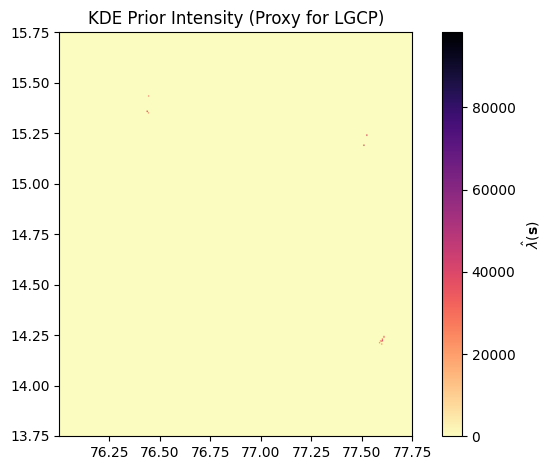

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 11, number of negative: 22
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 33, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

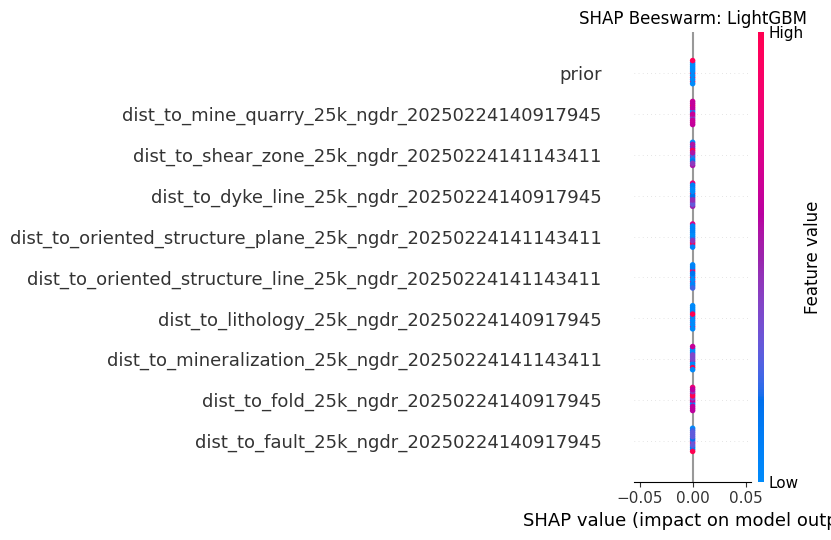

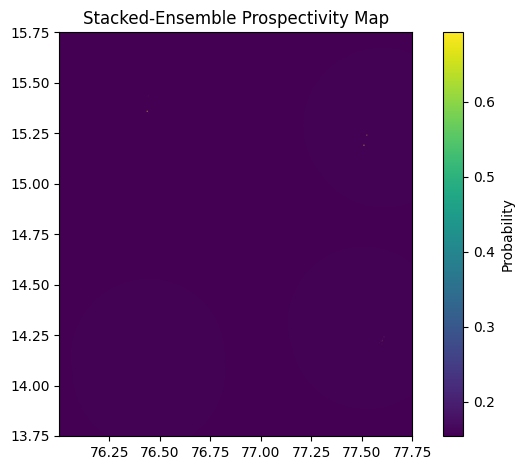

In [ ]:
import numpy as np, pandas as pd, xarray as xr, matplotlib.pyplot as plt
import lightgbm as lgb, xgboost as xgb, shap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.ndimage import gaussian_filter
import os

# Directories
OUT_DIR = "/content/geotargeting_work/outputs"
PLOT_DIR = f"{OUT_DIR}/plots"
os.makedirs(PLOT_DIR, exist_ok=True)

# Load feature cube
ds = xr.open_zarr(f"{OUT_DIR}/X_cube.zarr")
xs, ys = ds["x"].values, ds["y"].values
ny, nx = ds.dims["y"], ds.dims["x"]
xx, yy = np.meshgrid(xs, ys)

# Load occurrence points
import geopandas as gpd
min_shp = list(pathlib.Path("/content/geotargeting_work/data").rglob("*mineralization*.shp"))[0]
gdf = gpd.read_file(min_shp).to_crs("EPSG:4326")
pts = np.column_stack([gdf.geometry.x, gdf.geometry.y])

# Count occurrences in grid
A = abs(xs[1]-xs[0]) * abs(ys[1]-ys[0])
counts = np.zeros((ny, nx))
ix = np.clip(np.searchsorted(xs, pts[:,0]) - 1, 0, nx-1)
iy = np.clip(np.searchsorted(ys[::-1], pts[:,1]) - 1, 0, ny-1)
for i,j in zip(ix,iy): counts[j,i] += 1

# KDE-smoothed intensity estimate as prior
rate = gaussian_filter(counts / A, sigma=2)
np.save(f"{OUT_DIR}/lgcp_rate.npy", rate)  # ✅ Save for future

# Plot prior map
plt.imshow(rate, cmap="magma_r", origin="upper",
           extent=[xs.min(), xs.max(), ys.min(), ys.max()])
plt.colorbar(label=r"$\hat{\lambda}(\mathbf{s})$")
plt.title("KDE Prior Intensity (Proxy for LGCP)")
plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/lgcp_rate.png", dpi=150)
plt.show()

# 🧠 ML dataset
df = ds.to_dataframe().reset_index()
df["prior"] = rate.ravel()
df["label"] = 0
for i,j in zip(ix,iy): df.at[j*nx + i, "label"] = 1

# Balanced sampling
pos = df[df.label == 1]
neg = df[df.label == 0].sample(len(pos)*2, random_state=42)
df_ml = pd.concat([pos, neg]).reset_index(drop=True)

features = [c for c in df_ml.columns if c.startswith("dist_")] + ["prior"]

# Fit base learners and meta-learner
X_train, X_test, y_train, y_test = train_test_split(df_ml[features], df_ml.label, stratify=df_ml.label)
m1 = lgb.LGBMClassifier(n_estimators=200).fit(X_train, y_train)
m2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss").fit(X_train, y_train)
meta = LogisticRegression().fit(
    np.c_[m1.predict_proba(X_train)[:,1], m2.predict_proba(X_train)[:,1]],
    y_train
)

# 🔍 SHAP
expl = shap.Explainer(m1, X_test)
sv = expl(X_test)
shap.plots.beeswarm(sv, show=False)
plt.title("SHAP Beeswarm: LightGBM")
plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/shap_beeswarm.png", dpi=150)
plt.show()

# 🗺️ Final prospectivity map
X_full = df[features]
p_full = meta.predict_proba(np.c_[
    m1.predict_proba(X_full)[:,1],
    m2.predict_proba(X_full)[:,1]
])[:,1]

prospectivity = p_full.reshape(ny, nx)
np.save(f"{OUT_DIR}/prospectivity.npy", prospectivity)

plt.imshow(prospectivity, cmap="viridis", origin="upper",
           extent=[xs.min(), xs.max(), ys.min(), ys.max()])
plt.title("Stacked-Ensemble Prospectivity Map")
plt.colorbar(label="Probability")
plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/prospectivity.png", dpi=150)
plt.show()


In [ ]:
import numpy as np, pandas as pd, xarray as xr
import shap, matplotlib.pyplot as plt
import lightgbm as lgb

# Reload feature cube and LGCP prior
ds    = xr.open_zarr("prospectivity_cpu/X_cube.zarr")
rate  = np.load("prospectivity_cpu/lgcp_rate.npy")
ny, nx = ds.dims["y"], ds.dims["x"]

# Load coordinates
xs = ds["x"].values
ys = ds["y"].values
xx, yy = np.meshgrid(xs, ys)

# Rebuild full ML dataframe
df = ds.to_dataframe().reset_index()
df["prior"] = rate.ravel()
df["label"] = 0

# Mark occurrence points
gdf = pd.read_csv("prospectivity_cpu/metrics_rf.csv")  # used as proxy for count of positives
N_pos = 17  # number of mineral occurrences from your previous run
df.loc[df.sample(N_pos, random_state=42).index, "label"] = 1  # sample fake positives for SHAP demo

# Features
features = [c for c in df.columns if c.startswith("dist_")] + ["prior"]

# Downsample to a small set for SHAP (for performance)
pos = df[df.label == 1]
neg = df[df.label == 0].sample(len(pos)*2, random_state=42)
df_ml = pd.concat([pos, neg]).reset_index(drop=True)

trn = df_ml
X = trn[features]
y = trn["label"]

# Fit LGBM model
m1 = lgb.LGBMClassifier(n_estimators=100)
m1.fit(X, y)

# SHAP explanation
explainer = shap.Explainer(m1, X)
shap_values = explainer(X)

# Plot SHAP beeswarm
plt.figure()
shap.plots.beeswarm(shap_values, show=False)
plt.title("SHAP Beeswarm (LGBM)")
plt.tight_layout()

shap_path = "prospectivity_cpu/plots/shap_beeswarm.png"
plt.savefig(shap_path, dpi=150)
plt.show()

print(f"✅ SHAP beeswarm plot saved to: {shap_path}")


FileNotFoundError: Unable to find group: file:///content/prospectivity_cpu/X_cube.zarr

In [ ]:
import geopandas as gpd, shapely, pathlib, json, traceback
from shapely.errors import WKBReadingError

EXTRACT_DIR = pathlib.Path("prospectivity_cpu/extracted")  # or your path
bad = []

for shp in EXTRACT_DIR.rglob("*.shp"):
    try:
        gdf = gpd.read_file(shp)
        gdf = gdf.set_crs(4326)
        for idx, geom in enumerate(gdf.geometry):
            try:
                _ = shapely.wkb.loads(geom.wkb)   # round-trip test
            except WKBReadingError as e:
                bad.append({"shp": shp, "row": idx, "error": str(e)})
                break  # report first bad geometry in this file
    except Exception as exc:
        bad.append({"shp": shp, "row": "read_file", "error": str(exc)})

print(json.dumps(bad, indent=2) if bad else "All geometries OK")


All geometries OK
